<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/%D0%9F%D0%BE%D0%BF%D1%8B%D1%82%D0%BA%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install segments-ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 913.1 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 4.1 MB/s eta 0:00:00
  Created wheel for segments-ai: filename=segments_ai-1.6.2-py3-none-any.whl size=43869 sha256=0e48d14ca67584ae7516f36959c68628949404c7d64e1528a5b817eff6a8e7f1
  Stored in directory: /root/.cache/pip/wheels/fe/0a/31/c8487a6bb0e689acc760b354c726e44b6e3729bc9e6018733a
Successfully built segments-ai


In [4]:
from segments import SegmentsClient, SegmentsDataset
from segments.utils import export_dataset

# Initialize a SegmentsDataset from the release file
client = SegmentsClient('7d4e830aad20725decd837320b15caaae0ac1bbe')
release = client.get_release('tynshun/wineyard', 'v0.0.4') # Alternatively: release = 'flowers-v1.0.json'
dataset = SegmentsDataset(release, labelset='ground-truth', filter_by=['labeled', 'reviewed'])

# Export to COCO panoptic format
export_dataset(dataset, export_format='coco-panoptic')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 113/113 [00:03<00:00, 29.93it/s]


Initialized dataset with 113 images.
Exporting dataset. This may take a while...


100%|██████████| 113/113 [00:01<00:00, 86.56it/s]

Exported to ./export_coco-panoptic_tynshun_wineyard_v0.0.4.json. Images and labels in segments/tynshun_wineyard/v0.0.4


('./export_coco-panoptic_tynshun_wineyard_v0.0.4.json',
 'segments/tynshun_wineyard/v0.0.4')

COCO

In [5]:
pip install pycocotools

In [6]:
from pycocotools.coco import COCO

In [ ]:
coco = COCO('/content/export_coco-panoptic_tynshun_wineyard_v0.0.4.json')

In [9]:
import cv2
import json
import numpy as np
from pycocotools import mask as coco_mask
import matplotlib.pyplot as plt


In [10]:
# Загрузка JSON-файла аннотаций COCO
with open('/content/export_coco-panoptic_tynshun_wineyard_v0.0.4.json', 'r') as f:
    coco_data = json.load(f)
coco_data['annotations']

In [ ]:
coco_data['annotations']

In [16]:
path = '/content/segments/tynshun_wineyard/v0.0.4/'

In [32]:
image_data = coco_data['images'][0]
image_filename = image_data['file_name']
image_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_data['id']]
image_annotations
image_maskname = path + image_annotations[0]['file_name']
image_maskname

'/content/segments/tynshun_wineyard/v0.0.4/frame_12250_label_ground-truth_coco-panoptic.png'

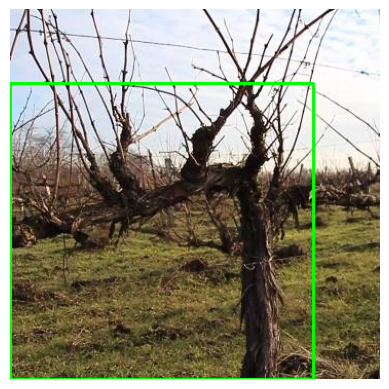

In [29]:
# Загрузка изображения
image = cv2.imread(path + image_filename)
# Создание маски для отображения
mask = np.zeros_like(image)
x, y, width, height = image_annotations[0]['segments_info'][0]['bbox']
result = cv2.rectangle(image, (int(x), int(y)), (int(x + width), int(y + height)), (0, 255, 0), 2)  # Зеленый цвет, толщина 2
# Отображение изображения с маской
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

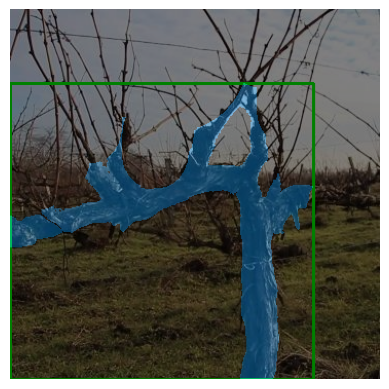

In [34]:
# Загрузка изображений
mask = cv2.imread(image_maskname)
# Размеры изображений (должны быть одинаковыми)
height, width, _ = image.shape

# Наложение изображений
alpha = 0.5  # Прозрачность для изображения 2
overlay = cv2.addWeighted(image, 1-alpha, mask, alpha, 0)

# Отображение изображения с маской
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [41]:
# Загрузка JSON-файла аннотаций COCO
with open('/content/export_coco-panoptic_tynshun_wineyard_v0.0.4.json', 'r') as f:
    coco_data = json.load(f)


In [45]:
import pandas as pd

In [54]:
df_images = pd.DataFrame(coco_data['images'])
df_images.head()

,id,file_name,height,width
0,1,frame_12250.jpg,360,360
1,2,frame_12293.jpg,360,360
2,3,frame_12430.jpg,360,360
3,4,frame_12306.jpg,360,360
4,5,frame_10853.jpg,360,360


In [58]:
df_images.rename(columns={'id': 'image_id'}, inplace=True)

In [55]:
df_annotations = pd.DataFrame(coco_data['annotations'])
df_annotations.head()

,segments_info,file_name,image_id
0,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12250_label_ground-truth_coco-panoptic.png,1
1,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12293_label_ground-truth_coco-panoptic.png,2
2,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12430_label_ground-truth_coco-panoptic.png,3
3,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12306_label_ground-truth_coco-panoptic.png,4
4,"[{'id': 12349696, 'category_id': 1, 'bbox': [1...",frame_10853_label_ground-truth_coco-panoptic.png,5


In [59]:
# Склеивание DataFrame по столбцу 'id'
merged_df = pd.merge(df_images, df_annotations, on='image_id')

In [60]:
merged_df

,image_id,file_name_x,height,width,segments_info,file_name_y
0,1,frame_12250.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12250_label_ground-truth_coco-panoptic.png
1,2,frame_12293.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12293_label_ground-truth_coco-panoptic.png
2,3,frame_12430.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12430_label_ground-truth_coco-panoptic.png
3,4,frame_12306.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_12306_label_ground-truth_coco-panoptic.png
4,5,frame_10853.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [1...",frame_10853_label_ground-truth_coco-panoptic.png
...,...,...,...,...,...,...
108,109,frame_16249.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_16249_label_ground-truth_coco-panoptic.png
109,110,frame_18608.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_18608_label_ground-truth_coco-panoptic.png
110,111,frame_16270.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_16270_label_ground-truth_coco-panoptic.png
111,112,frame_16279.jpg,360,360,"[{'id': 12349696, 'category_id': 1, 'bbox': [0...",frame_16279_label_ground-truth_coco-panoptic.png


# Загрузка датасета с сайта сегментации

In [ ]:
pip install segments-ai

In [ ]:
from segments import SegmentsClient, SegmentsDataset
from segments.utils import export_dataset

# Initialize a SegmentsDataset from the release file
client = SegmentsClient('7d4e830aad20725decd837320b15caaae0ac1bbe')
release = client.get_release('tynshun/wineyard', 'v0.0.4') # Alternatively: release = 'flowers-v1.0.json'
dataset = SegmentsDataset(release, labelset='ground-truth', filter_by=['labeled', 'reviewed'])

# Export to COCO panoptic format
export_dataset(dataset, export_format='coco-panoptic')

# Функция для получения списка имен масок и изображений

In [67]:
import pandas as pd
import json

def get_df_images_masks(path_to_coco, path):
  # Загрузка JSON-файла аннотаций COCO
  with open(path_to_coco, 'r') as f:
    coco_data = json.load(f)
  df_images = pd.DataFrame(coco_data['images'])
  df_images['file_name'] = df_images['file_name'].apply(lambda x: path + x)
  df_images.rename(columns={'id': 'image_id'}, inplace=True)
  df_annotations = pd.DataFrame(coco_data['annotations'])
  df_annotations['file_name'] = df_annotations['file_name'].apply(lambda x: path + x)
  # Склеивание DataFrame по столбцу 'id'
  merged_df = pd.merge(df_images, df_annotations, on='image_id')
  return merged_df

df = get_df_images_masks('/content/export_coco-panoptic_tynshun_wineyard_v0.0.4.json', '/content/segments/tynshun_wineyard/v0.0.4/')

# Функции для вывода изображений и масок

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

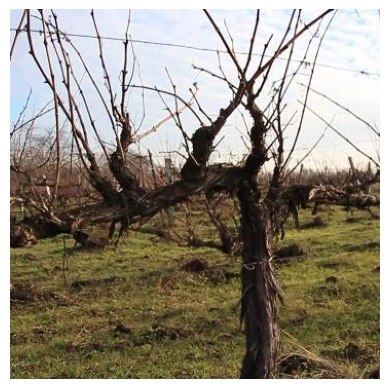

In [76]:
def show_image_from_df(image_path):
  image = cv2.imread(image_path)
  # Отображение изображения
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

image_path = df['file_name_x'][0]
show_image_from_df(image_path)

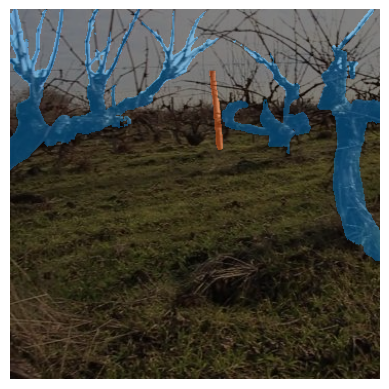

In [78]:
def show_image_and_mask_from_df(image_path, mask_path):
  image = cv2.imread(image_path)
  mask = cv2.imread(mask_path)
  # Размеры изображений (должны быть одинаковыми)
  height, width, _ = image.shape

  # Наложение изображений
  alpha = 0.5  # Прозрачность для изображения 2
  overlay = cv2.addWeighted(image, 1-alpha, mask, alpha, 0)

  # Отображение изображения с маской
  plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

image_path = df['file_name_x'][7]
mask_path = df['file_name_y'][7]
show_image_and_mask_from_df(image_path, mask_path)

Дальше мы можем разделить наш датасет на train val test и попробовать вывести изображения из него.